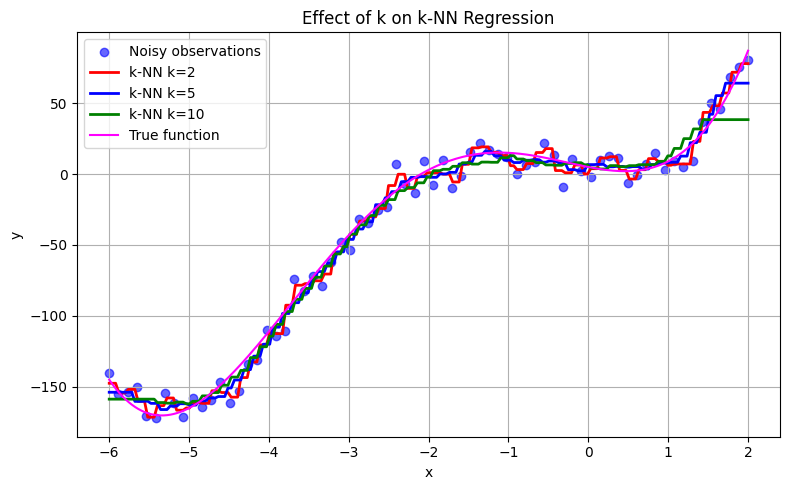

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor

# -------------------------
# Generate synthetic quartic data
# -------------------------
np.random.seed(42)
X = np.linspace(-6, 2, 70).reshape(-1, 1)          # 50 points
y = (X**4 + 8*X**3 + 6*X**2 - 11*X + 5).ravel()
y_noisy = y + np.random.normal(0, 10, size=y.shape)  # Add Gaussian noise

# Dense grid for smooth prediction lines
X_dense = np.linspace(-6, 2, 200).reshape(-1, 1)

# -------------------------
# k-NN regression for different k
# -------------------------
ks = [2, 5, 10]
plt.figure(figsize=(8,5))
plt.scatter(X, y_noisy, color='blue', alpha=0.6, label='Noisy observations')

colour = ['red', 'blue', 'green']
for i, k in enumerate(ks):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X, y_noisy)
    y_pred = knn.predict(X_dense)
    plt.plot(X_dense, y_pred, linewidth=2, label=f'k-NN k={k}', color=colour[i])

# True function
plt.plot(X_dense, (X_dense**4 + 8*X_dense**3 + 6*X_dense**2 - 11*X_dense + 5), 
         color='magenta',  label='True function')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Effect of k on k-NN Regression')
plt.legend()
plt.tight_layout()
plt.grid(True)

# Save figure
plt.savefig('img/knn_effect_of_k.png', dpi=300)

plt.show()